In [9]:
import sqlite3

# Verbinden mit der Datenbank (wird erstellt, wenn sie nicht existiert)
conn = sqlite3.connect('world_population_DB.db')

# Erstellen eines Cursors-Objekts, um Befehle auszuführen
c = conn.cursor()

# Erstellen einer Tabelle
c.execute('''CREATE TABLE IF NOT EXISTS population (
          Rank INTEGER,
          CCA3 STRING,
          Country_Territory STRING,
          Capital STRING,
          Continent STRING,
          Population_2022 INTEGER,
          Population_2020 INTEGER,
          Population_2015 INTEGER,
          Population_2010 INTEGER,
          Population_2000 INTEGER,
          Population_1990 INTEGER,
          Population_1980 INTEGER,
          Population_1970 INTEGER,
          Area_km2 INTEGER,
          Density_per_km2 FLOAT,
          Growth_Rate FLOAT,
          World_Population_Percentage FLOAT
            )''')

# Transaktionen abschließen
conn.commit()

# Schließen der Verbindung
conn.close()

## Requirement 1 - Collection of real-world data

In [3]:
# Libraries
import os
import json
import numpy as np
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# API credentials for Kaggle
with open('kaggle.json') as f:
    data = json.load(f)

os.environ['KAGGLE_USERNAME'] = data['username']
os.environ['KAGGLE_KEY'] = data['key']

from kaggle.api.kaggle_api_extended import KaggleApi

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
print(os.getcwd())


# Initialize API
api = KaggleApi()
api.authenticate()

# Download file
api.dataset_download_file('iamsouravbanerjee/world-population-dataset','world_population.csv')

# Read data to pandas data frame
df = pd.read_csv('world_population.csv', sep=',',on_bad_lines='skip')

print("World Population Dataframe:")
print(df.to_string())




c:\Users\senth\Scientific Programming\projectwork_SP_FS2024_group_05
World Population Dataframe:
     Rank CCA3                 Country_Territory              Capital      Continent  Population_2022  Population_2020  Population_2015  Population_2010  Population_2000  Population_1990  Population_1980  Population_1970  Area_km2  Density_per_km2  Growth_Rate  World_Population_Percentage
0      36  AFG                       Afghanistan                Kabul           Asia         41128771         38972230         33753499         28189672         19542982         10694796         12486631         10752971    652230          63.0587       1.0257                         0.52
1     138  ALB                           Albania               Tirana         Europe          2842321          2866849          2882481          2913399          3182021          3295066          2941651          2324731     28748          98.8702       0.9957                         0.04
2      34  DZA                   

In [2]:
import sqlite3
import pandas as pd

# Load the CSV data into a DataFrame
file_path = 'world_population.csv'
df = pd.read_csv(file_path)

# Connect to the SQLite database
conn = sqlite3.connect('world_population_DB.db')
c = conn.cursor()

# Prepare the DataFrame to match the table schema
df.columns = ['Rank', 'CCA3', 'Country_Territory', 'Capital', 'Continent', 
              'Population_2022', 'Population_2020', 'Population_2015', 'Population_2010', 
              'Population_2000', 'Population_1990', 'Population_1980', 'Population_1970', 
              'Area_km2', 'Density_per_km2', 'Growth_Rate', 'World_Population_Percentage']

# Insert the data into the SQLite table
df.to_sql('population', conn, if_exists='append', index=False)

# Commit the transaction
conn.commit()

# Close the connection
conn.close()


ParserError: Error tokenizing data. C error: Expected 17 fields in line 235, saw 18


## Requirement 2 - Data preparation (e.g. strings to numerical using regular expressions)

In [5]:
string_columns = df.select_dtypes(include=['object']).columns
df[string_columns] = df[string_columns].astype('string')

print(df.dtypes)

df['Density_per_km2'] = df['Density_per_km2'].round(2)
df['Growth_Rate'] = df['Growth_Rate'].round(2)

print("\nDataFrame with rounded columns:")
print(df[['Density_per_km2', 'Growth_Rate']].head())

print(df.to_string())

Rank                                    int64
CCA3                           string[python]
Country_Territory              string[python]
Capital                        string[python]
Continent                      string[python]
Population_2022                         int64
Population_2020                         int64
Population_2015                         int64
Population_2010                         int64
Population_2000                         int64
Population_1990                         int64
Population_1980                         int64
Population_1970                         int64
Area_km2                                int64
Density_per_km2                       float64
Growth_Rate                           float64
World_Population_Percentage           float64
dtype: object

DataFrame with rounded columns:
   Density_per_km2  Growth_Rate
0            63.06         1.03
1            98.87         1.00
2            18.85         1.02
3           222.48         0.98
4          

## Requirement 3 - Use of Python built-in data structures (lists, dictionaries, sets, tuples) and pandas data frames

In [6]:
#Lists
countries = df['Country_Territory'].tolist()
populations = df['Population_2022'].tolist()

#Dictionary
country_population_dict = dict(zip(countries, populations))

print(country_population_dict)

{'Afghanistan': 41128771, 'Albania': 2842321, 'Algeria': 44903225, 'American Samoa': 44273, 'Andorra': 79824, 'Angola': 35588987, 'Anguilla': 15857, 'Antigua and Barbuda': 93763, 'Argentina': 45510318, 'Armenia': 2780469, 'Aruba': 106445, 'Australia': 26177413, 'Austria': 8939617, 'Azerbaijan': 10358074, 'Bahamas': 409984, 'Bahrain': 1472233, 'Bangladesh': 171186372, 'Barbados': 281635, 'Belarus': 9534954, 'Belgium': 11655930, 'Belize': 405272, 'Benin': 13352864, 'Bermuda': 64184, 'Bhutan': 782455, 'Bolivia': 12224110, 'Bosnia and Herzegovina': 3233526, 'Botswana': 2630296, 'Brazil': 215313498, 'British Virgin Islands': 31305, 'Brunei': 449002, 'Bulgaria': 6781953, 'Burkina Faso': 22673762, 'Burundi': 12889576, 'Cambodia': 16767842, 'Cameroon': 27914536, 'Canada': 38454327, 'Cape Verde': 593149, 'Cayman Islands': 68706, 'Central African Republic': 5579144, 'Chad': 17723315, 'Chile': 19603733, 'China': 1425887337, 'Colombia': 51874024, 'Comoros': 836774, 'Cook Islands': 17011, 'Costa Ri

In [6]:
# Use sets to find unique values
continents = set(df['Continent'])

# Tuples
country_population_tuples = list(zip(countries, populations))

print(country_population_tuples)

[('Afghanistan', 41128771), ('Albania', 2842321), ('Algeria', 44903225), ('American Samoa', 44273), ('Andorra', 79824), ('Angola', 35588987), ('Anguilla', 15857), ('Antigua and Barbuda', 93763), ('Argentina', 45510318), ('Armenia', 2780469), ('Aruba', 106445), ('Australia', 26177413), ('Austria', 8939617), ('Azerbaijan', 10358074), ('Bahamas', 409984), ('Bahrain', 1472233), ('Bangladesh', 171186372), ('Barbados', 281635), ('Belarus', 9534954), ('Belgium', 11655930), ('Belize', 405272), ('Benin', 13352864), ('Bermuda', 64184), ('Bhutan', 782455), ('Bolivia', 12224110), ('Bosnia and Herzegovina', 3233526), ('Botswana', 2630296), ('Brazil', 215313498), ('British Virgin Islands', 31305), ('Brunei', 449002), ('Bulgaria', 6781953), ('Burkina Faso', 22673762), ('Burundi', 12889576), ('Cambodia', 16767842), ('Cameroon', 27914536), ('Canada', 38454327), ('Cape Verde', 593149), ('Cayman Islands', 68706), ('Central African Republic', 5579144), ('Chad', 17723315), ('Chile', 19603733), ('China', 14

In [7]:
country_population_tuples = list(zip(countries, populations))

print("\nList of countries:")
print(countries[:10])  

print("\nList of populations:")
print(populations[:10]) 

print("\nDictionary of country and population:")
print(list(country_population_dict.items())[:10]) 


List of countries:
['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia']

List of populations:
[41128771, 2842321, 44903225, 44273, 79824, 35588987, 15857, 93763, 45510318, 2780469]

Dictionary of country and population:
[('Afghanistan', 41128771), ('Albania', 2842321), ('Algeria', 44903225), ('American Samoa', 44273), ('Andorra', 79824), ('Angola', 35588987), ('Anguilla', 15857), ('Antigua and Barbuda', 93763), ('Argentina', 45510318), ('Armenia', 2780469)]


In [8]:
print("\nSet of unique continents:")
print(continents)


Set of unique continents:
{'Asia', 'South America', 'Africa', 'Europe', 'North America', 'Oceania'}


In [9]:

print("\nList of tuples (country, population):")
print(country_population_tuples[:10])  


List of tuples (country, population):
[('Afghanistan', 41128771), ('Albania', 2842321), ('Algeria', 44903225), ('American Samoa', 44273), ('Andorra', 79824), ('Angola', 35588987), ('Anguilla', 15857), ('Antigua and Barbuda', 93763), ('Argentina', 45510318), ('Armenia', 2780469)]


## Requirement 4 - Use of conditional statements, loop control statements and loops

In [8]:
class PopulationData:
    def __init__(self, dataframe):
        self.df = dataframe

    def categorize_population(self, population):
        if population < 1_000_000:
            return 'Small'
        elif population < 10_000_000:
            return 'Medium'
        else:
            return 'Large'

    def add_population_category(self):
        self.df['Population Category'] = self.df['Population_2022'].apply(self.categorize_population)

    def calculate_continent_summary(self):
        self.continent_population_summary = {}
        for continent in self.df['Continent'].unique():
            continent_data = self.df[self.df['Continent'] == continent]
            total_population = continent_data['Population_2022'].sum()
            average_population = int(np.ceil(continent_data['Population_2022'].mean()))  # Round up and convert to int
            self.continent_population_summary[continent] = {
                'Total Population': total_population,
                'Average Population': average_population
            }

    def get_continent_summary(self):
        return self.continent_population_summary

    def filter_countries_by_population(self, threshold):
        filtered_countries = []
        for index, row in self.df.iterrows():
            if row['Population_2022'] > threshold:
                filtered_countries.append(row['Country_Territory'])
        return filtered_countries


# Initialize the PopulationData class with the DataFrame
population_data = PopulationData(df)

# Add population category
population_data.add_population_category()

# Print the DataFrame to see the output
print("\nDataFrame with Population Category:")
print(population_data.df[['Country_Territory', 'Population_2022', 'Population Category']].head())

# Calculate and print continent population summary
population_data.calculate_continent_summary()
continent_summary = population_data.get_continent_summary()
print("\nContinent Population Summary:")
for continent, summary in continent_summary.items():
    print(f"{continent}: Total Population = {summary['Total Population']}, Average Population = {summary['Average Population']}")

# Filter countries by population threshold and print them
population_threshold = 5_000_000
filtered_countries = population_data.filter_countries_by_population(population_threshold)
print(f"\nCountries with population greater than {population_threshold}:")
print(filtered_countries)



DataFrame with Population Category:
  Country_Territory  Population_2022 Population Category
0       Afghanistan         41128771               Large
1           Albania          2842321              Medium
2           Algeria         44903225               Large
3    American Samoa            44273               Small
4           Andorra            79824               Small

Continent Population Summary:
Asia: Total Population = 4721383274, Average Population = 94427666
Europe: Total Population = 743147538, Average Population = 14862951
Africa: Total Population = 1410410395, Average Population = 25185900
Oceania: Total Population = 45038554, Average Population = 1958198
North America: Total Population = 600296136, Average Population = 15007404
South America: Total Population = 436816608, Average Population = 31201187

Countries with population greater than 5000000:
['Afghanistan', 'Algeria', 'Angola', 'Argentina', 'Australia', 'Austria', 'Azerbaijan', 'Bangladesh', 'Belarus', 'Belgiu

## Requirement 6 - Use of tables, vizualizations/graphics for data exploration


Continent Population Summary Table:
+---------------+------------------+--------------------+
|   Continent   | Total Population | Average Population |
+---------------+------------------+--------------------+
|     Asia      |    4721383274    |      94427666      |
|    Europe     |    743147538     |      14862951      |
|    Africa     |    1410410395    |      25185900      |
|    Oceania    |     45038554     |      1958198       |
| North America |    600296136     |      15007404      |
| South America |    436816608     |      31201187      |
+---------------+------------------+--------------------+


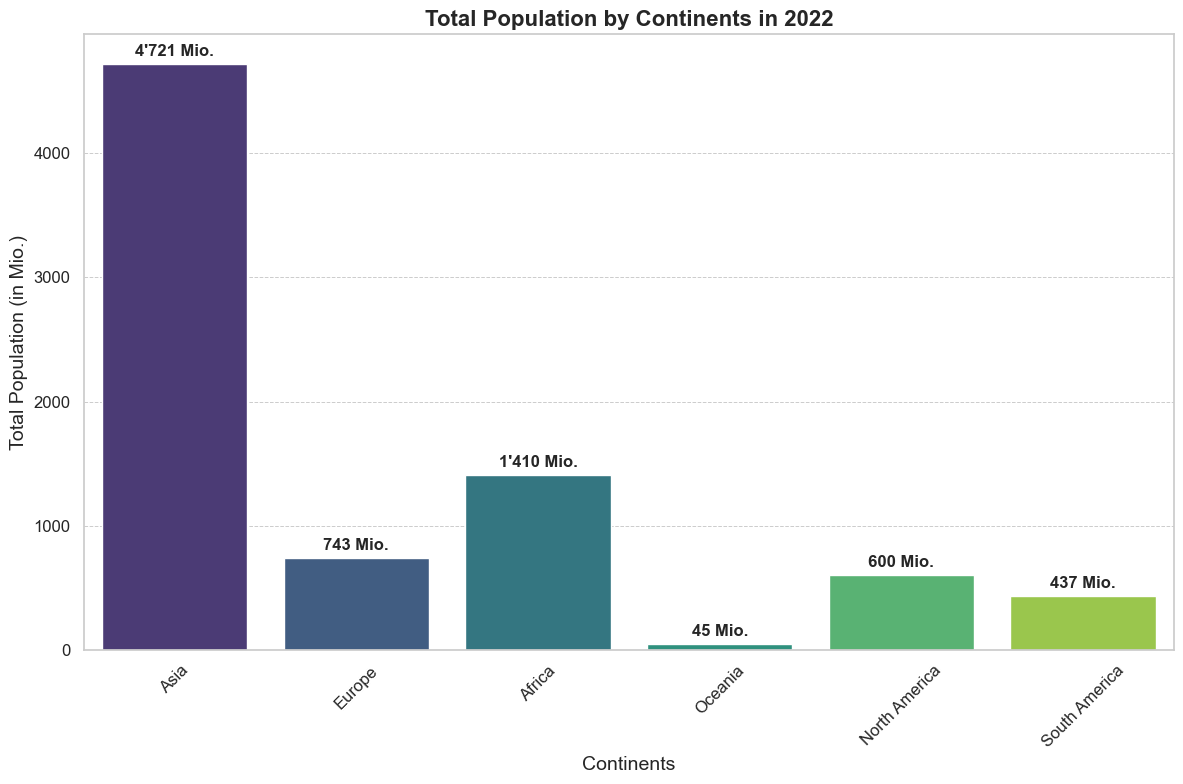

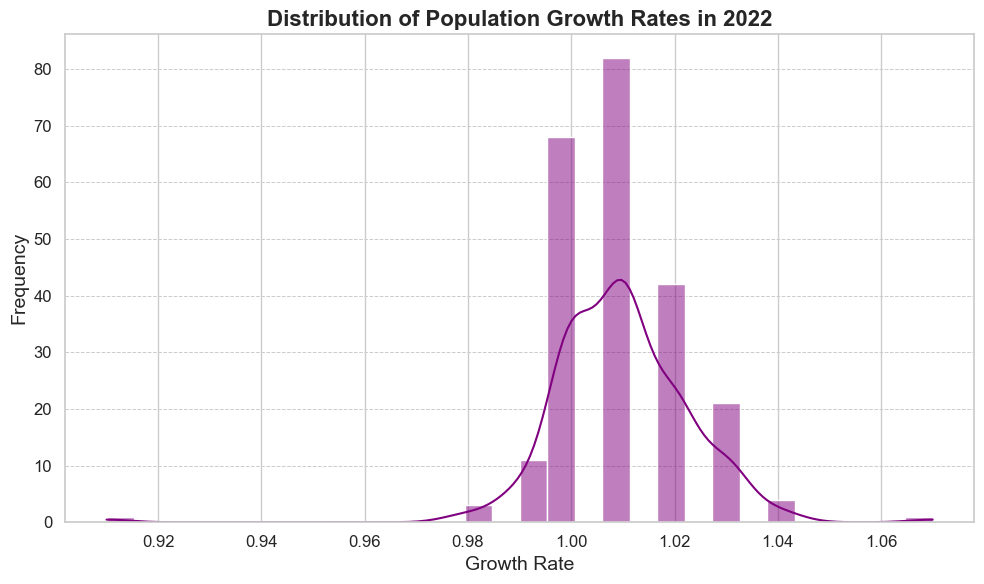

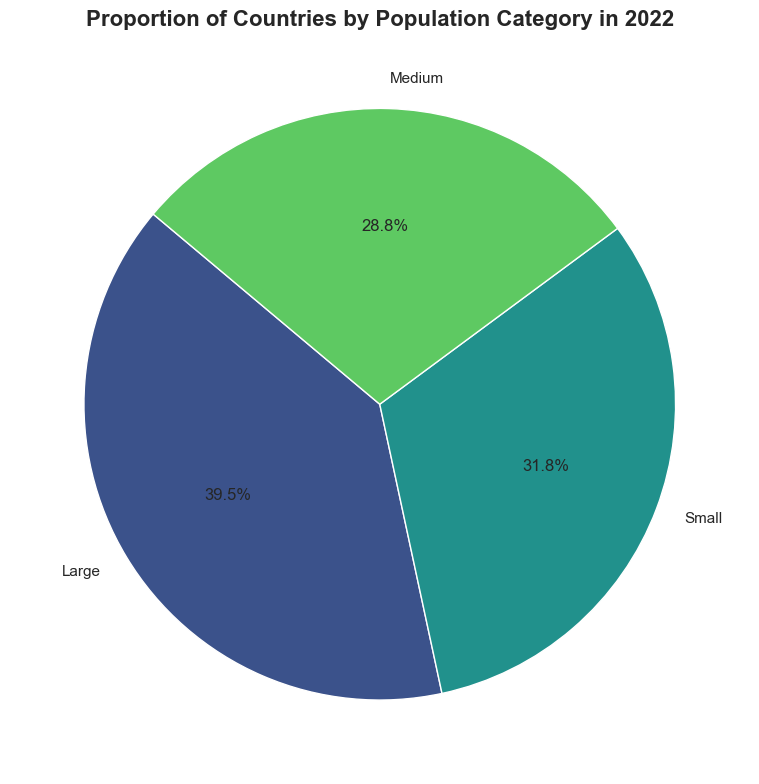

In [37]:
#Initialize the PopulationData class with the DataFrame
population_data = PopulationData(df)

#Add population category
population_data.add_population_category()

#Calculate continent population summary
population_data.calculate_continent_summary()
continent_summary = population_data.get_continent_summary()

#Display continent summary as a table
table = [[continent, summary['Total Population'], summary['Average Population']] for continent, summary in continent_summary.items()]
print("\nContinent Population Summary Table:")
print(tabulate(table, headers=['Continent', 'Total Population', 'Average Population'], tablefmt='pretty'))

#Bar plot of total population by continent
continent_df = pd.DataFrame(continent_summary).T.reset_index().rename(columns={'index': 'Continent'})
continent_df['Total Population'] = continent_df['Total Population'] / 1e6
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
barplot = sns.barplot(data=continent_df, x='Continent', y='Total Population', palette='viridis')
plt.title('Total Population by Continents in 2022', fontsize=16, fontweight='bold')
plt.xlabel('Continents', fontsize=14)
plt.ylabel('Total Population (in Mio.)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

for p in barplot.patches:
    barplot.annotate(f"{p.get_height():,.0f}".replace(",", "'") + " Mio.",
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', 
                     xytext=(0, 9), 
                     textcoords='offset points',
                     fontsize=12, fontweight='bold')

plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.savefig('Charts/1. Bar plot_Total Population by continent.png')
plt.show()


#Histogram of the population growth rates from 2022
plt.figure(figsize=(10, 6))
sns.histplot(df['Growth_Rate'], bins=30, kde=True, color='purple')
plt.title('Distribution of Population Growth Rates in 2022', fontsize=16, fontweight='bold')
plt.xlabel('Growth Rate', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.savefig('Charts/2. Histogram_Population Growth Rates.png')
plt.show()

#Pie chart of population categories
category_counts = df['Population Category'].value_counts()
sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))
plt.pie(category_counts, 
        labels=category_counts.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=sns.color_palette("viridis", len(category_counts)),
        wedgeprops=dict(edgecolor='w'))
plt.title('Proportion of Countries by Population Category in 2022', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('Charts/3. Pie chart_Population Categories.png')
plt.show()

## Requirement 7 - Integration of a statistical analyses (e.g. correlation analysis, statistical test); must contain a p-value.


Correlation Analysis with 'Population_2022':
Density_per_km2:
  Correlation Coefficient: -0.0277
  P-value: 0.6737
Growth_Rate:
  Correlation Coefficient: -0.0131
  P-value: 0.8428


<Figure size 1200x600 with 0 Axes>

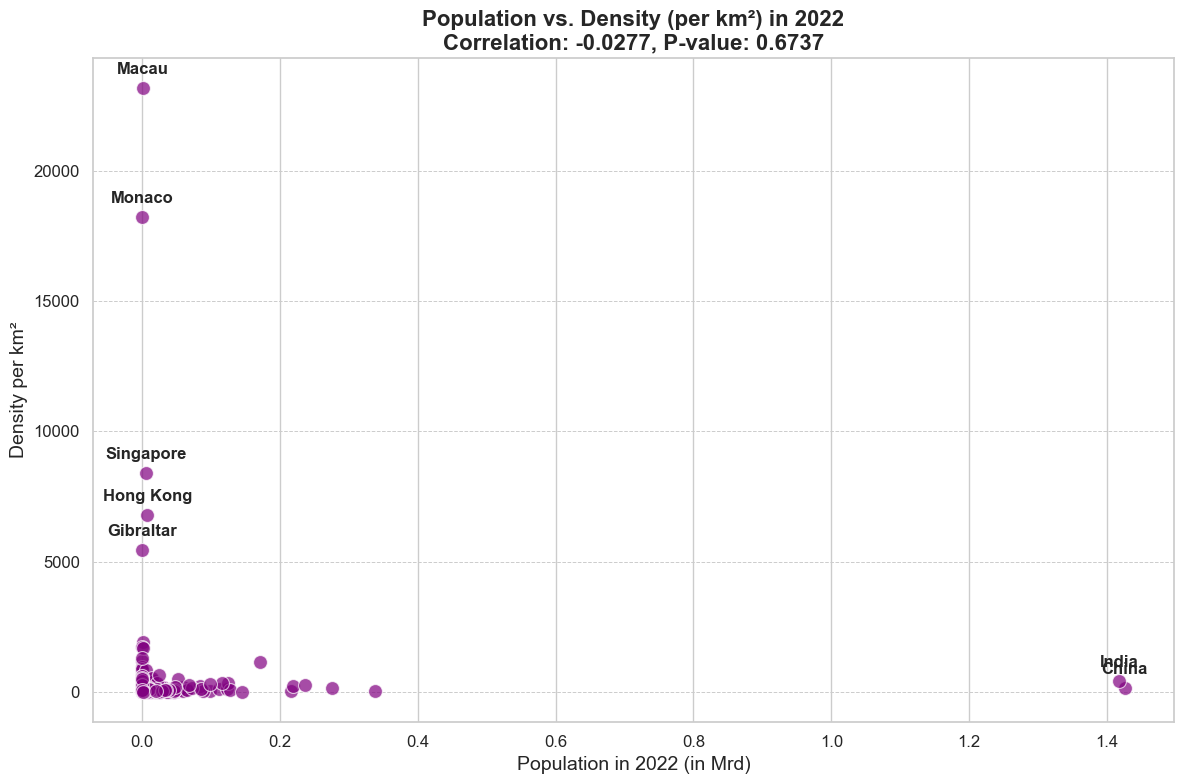

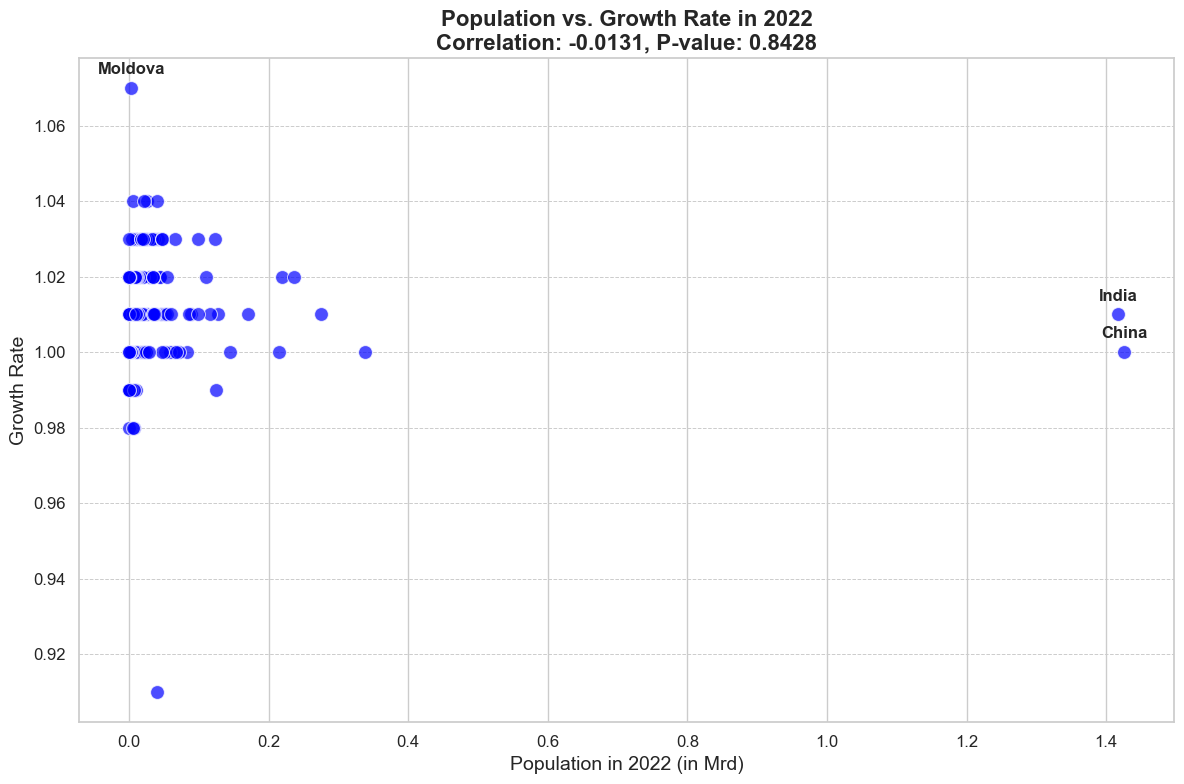

In [41]:
# Select numerical columns for correlation analysis
numerical_columns = ['Population_2022', 'Density_per_km2', 'Growth_Rate']

# Calculate correlation coefficients and p-values
correlation_results = {}
for col in numerical_columns:
    if col != 'Population_2022':
        corr, p_value = pearsonr(df['Population_2022'], df[col])
        correlation_results[col] = {'Correlation Coefficient': corr, 'P-value': p_value}

# Display the correlation results
print("\nCorrelation Analysis with 'Population_2022':")
for col, results in correlation_results.items():
    print(f"{col}:")
    print(f"  Correlation Coefficient: {results['Correlation Coefficient']:.4f}")
    print(f"  P-value: {results['P-value']:.4f}")

#Visualization of correlation
plt.figure(figsize=(12, 6))

#Scatter Plot Population vs Density with Annotations
df['Population_2022_Billions'] = df['Population_2022'] / 1e9

# Set a modern style
sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(x=df['Population_2022_Billions'], y=df['Density_per_km2'], color='purple', s=100, alpha=0.7, edgecolor='w')
plt.title(f"Population vs. Density (per km²) in 2022\nCorrelation: {correlation_results['Density_per_km2']['Correlation Coefficient']:.4f}, P-value: {correlation_results['Density_per_km2']['P-value']:.4f}", fontsize=16, fontweight='bold')
plt.xlabel('Population in 2022 (in Mrd)', fontsize=14)
plt.ylabel('Density per km²', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.7)

# Annotate the top 5 countries with the highest population density
top_density_countries = df.nlargest(5, 'Density_per_km2')
for idx, row in top_density_countries.iterrows():
    plt.annotate(row['Country_Territory'], (row['Population_2022_Billions'], row['Density_per_km2']),
                 textcoords="offset points", xytext=(0,10), ha='center', fontsize=12, fontweight='bold')

# Annotate the countries with a population around 1.4 billion (1.4 Mrd)
high_population_countries = df[df['Population_2022_Billions'].between(1.35, 1.45)]
for idx, row in high_population_countries.iterrows():
    plt.annotate(row['Country_Territory'], (row['Population_2022_Billions'], row['Density_per_km2']),
                 textcoords="offset points", xytext=(0,10), ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('Charts/4. Scatter Plot_Population vs Density.png')
plt.show()

# Scatter plot for '2022 Population' vs 'Growth Rate'
sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(x=df['Population_2022_Billions'], y=df['Growth_Rate'], color='blue', s=100, alpha=0.7, edgecolor='w')
plt.title(f"Population vs. Growth Rate in 2022\nCorrelation: {correlation_results['Growth_Rate']['Correlation Coefficient']:.4f}, P-value: {correlation_results['Growth_Rate']['P-value']:.4f}", fontsize=16, fontweight='bold')
plt.xlabel('Population in 2022 (in Mrd)', fontsize=14)
plt.ylabel('Growth Rate', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.7)

# Annotate the top country with the highest growth rate
top_growth_countries = df.nlargest(1, 'Growth_Rate')
for idx, row in top_growth_countries.iterrows():
    plt.annotate(row['Country_Territory'], (row['Population_2022_Billions'], row['Growth_Rate']),
                 textcoords="offset points", xytext=(0,10), ha='center', fontsize=12, fontweight='bold')

# Annotate the countries with a population around 1.4 billion (1.4 Mrd)
high_population_countries = df[df['Population_2022_Billions'].between(1.35, 1.45)]
for idx, row in high_population_countries.iterrows():
    plt.annotate(row['Country_Territory'], (row['Population_2022_Billions'], row['Growth_Rate']),
                 textcoords="offset points", xytext=(0,10), ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('Charts/5. Scatter Plot_Population vs Growth Rate.png')
plt.show()